##  Seaborn vs Plotly Express

Most beginners and professions are using Seaborn as visualization tool for EDA. Choice is simple as Seaborn make visualization lot easier and nicer than any other visualization tool. That was the understanding I had until I work through Ploty Express lately. Plotly Express provide same good looking graphs with few code lines and interactive on the other hand. Another good aspect in Plotly Express is that formatting the graphs is lot more easily than Seaborn with in same number of code lines. Let me explain what I just said with an example. Let’s look at a code block of Seaborn and Plotly Express to style a graph. Let me load all necessary Libraries.

In [176]:
import pandas as pd

import seaborn as sns ## These Three lines are necessary for Seaborn to work   
import matplotlib.pyplot as plt 
sns.set(color_codes=True)

%matplotlib inline 


import plotly_express as px ##Plotly Express need only one line to load the libraries

In [ ]:
auto = pd.read_csv('https://raw.githubusercontent.com/rchinthaka/Plotly-Express-Vs-Seaborn/master/Automobile.csv') ## Loading the data set 

In [178]:
auto.head() ## Let's take look on the data set

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Let's try to plot simple box plot of Seaborn and Plotly Express and then Style it till we get good looking professional graph. After comparison of styling of graphs, I will most typically used visualizations in EDA to compare Plotly Express and Seaborn.

#### Seaborn Box Plot

This box plot is using to visualize bivariate distribution between numerical variable and categorical variable from the data set. It is a single line code in Seaborn.

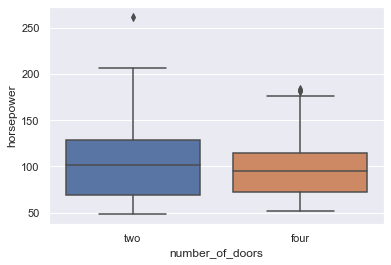

In [179]:
sns.boxplot(auto['number_of_doors'], auto['horsepower']);

#### Plotly Express Box Plot

This box plot is using same visualize as above seaborn box plot and its need two lines of codes.

In [180]:
fig = px.box(auto, x="number_of_doors", y="horsepower")
fig.show()

Now if we look at this basic two box plots from Seaboen and Plotly Express, I found below comparison points:

Seaborn: default plot is too small (not interactive).

Plotly Express: default plot is too big (interactive). 

Let’s resize both plots and add some styling and then let’s see how many extra code lines added by each library.

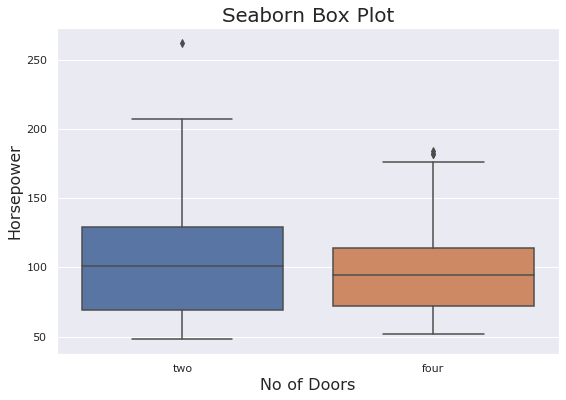

In [181]:
sns.set(font="Verdana") ## Global font type , this will apply for all seaborn plots
plt.figure(figsize=(9,6)) ## Changing the Figure Size 
box=sns.boxplot(auto['number_of_doors'], auto['horsepower']) # Define the plot with variables 
box.axes.set_title("Seaborn Box Plot",fontsize=20) # Set the Tittle for the defined plot
box.set_xlabel("No of Doors",fontsize=16) # Set the x-axis Label and fornt size
box.set_ylabel("Horsepower",fontsize=16); # Set the y-axis Label and fornt size

In [182]:
# Defining the plot with Size and Title text 
fig = px.box(auto, x="number_of_doors", y="horsepower",width=700, height=500,title='Plotly Express Box Plot',labels={"horsepower": "Horsepower",  "number_of_doors": "No of Doors"}) 
fig.update_layout(font_family="Courier New", # Changing Styling of the plot 
    font_color="black",
    font_size=16,              
    title_font_family="Times New Roman",
    title_font_color="green",
    title_font_size=26,              
    title={'y':0.9,'x':0.5}) # Change the Title Alignment
fig.show()

Pretty good ha!! Which plot do you prefer more? Here are few comparison points.
Seaboarn formatting is not well documented and difficult to find, still I was not able to find how to change Font colors easily. On the other hand Plotly Express documentation very rich in samples and there are many ways to do the same formatting. Each way has its own befits and you can style each element in the plot after few search. No of code lines has no big difference and Plotly provide the greatest advantage of interactivity.


## Plotting univariate distributions
## Histogram

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE). Here subplot option of matplotlib has used to plot two graphs in same row.    

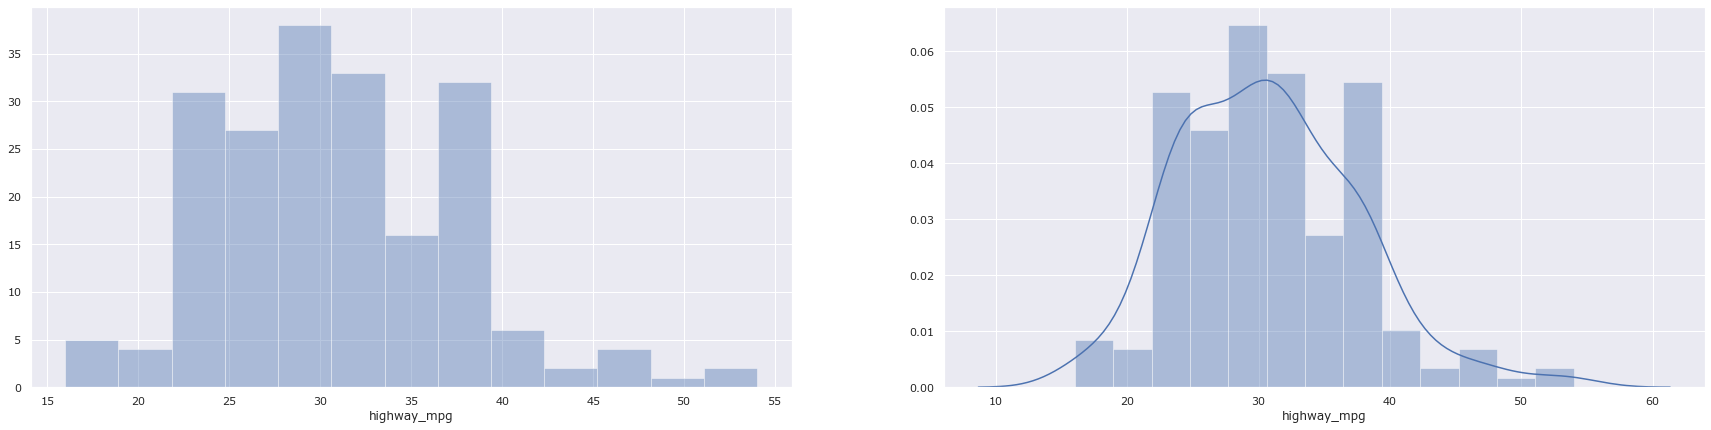

In [183]:
fig, axs = plt.subplots(ncols = 2, figsize = (30, 7))
sns.distplot(auto['highway_mpg'],ax=axs[0],kde=False);
sns.distplot(auto['highway_mpg'],ax=axs[1]);

In Plotly , It is easy to format the histogram , but there is no KDE option. As Plotly is interactive graphs, bin details can be analyzed better than Seaborn.

https://plotly.com/python/histograms/

In [184]:
fig = px.histogram(auto, x="highway_mpg",histnorm='probability density',width=600, height=400)
fig.show()

Subplot option in Plotly is as below. Here Plotly graph object and Plotly subplots option is used for subplots. This is the most convenient way to do it in Plotly.

In [185]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2,subplot_titles=("Histograp with count", "histogram with probability density"))

trace0 = go.Histogram(x=auto['highway_mpg'])
trace1 = go.Histogram(x=auto['highway_mpg'],histnorm='probability density')

fig.append_trace(trace0, 1, 1,)
fig.append_trace(trace1, 1, 2)

fig.show()

## Plotting bivariate distributions

It can also be useful to visualize a relationship between two variables. The easiest way to do this in seaborn is to use the jointplot() function, which creates a scatterplot of the two variables along with the histograms of each next to the appropriate axes.



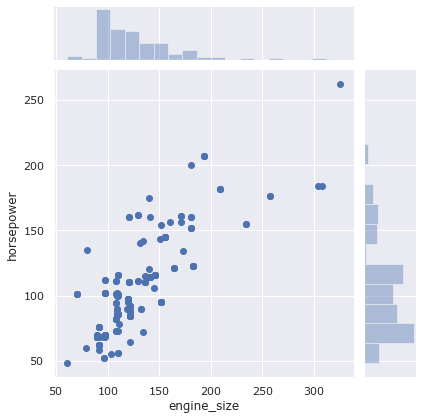

In [186]:
sns.jointplot(auto['engine_size'], auto['horsepower']);


Plotly Express offers same graphs of jointplot but in scatter plot option. Outputs is similar but interactive.

https://plotly.com/python/line-and-scatter/

In [187]:
fig = px.scatter(auto, x="engine_size", y="horsepower",marginal_y="histogram",marginal_x="histogram",width=600, height=600)
fig.show()

Scatter plot option in Plotly is very good way to visualize different dimensions of variability in the dataset. Below example is using variability of five variables:
X Axis: Engine Size, Y Axis: horsepower , drive_wheels in different colors , price in different size of the bubble. Fifth variable (umber_of_doors) is visible when you move mouse pointer on a bubble.


In [188]:
fig = px.scatter(auto, x="engine_size", y="horsepower",color="drive_wheels",size='price',hover_data=['number_of_doors'],width=900, height=500)
fig.show()

### Kernel Density Estimation

We can make a 2D estimation of the density also using Seaborn and Plotly Express , KDE option is not available in Plotly Express directly, But can be added if requred with many more mode lines. Example is explained in Documantation. 

https://plotly.com/python/2d-histogram-contour/

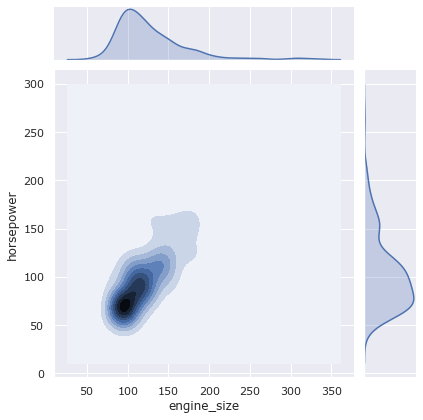

In [189]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="kde");

In [190]:
fig = go.Figure(go.Histogram2dContour(
        x = auto['engine_size'],
        y = auto['horsepower'],
        colorscale = 'Blues'
))
fig.update_layout(width=500, height=500)
fig.show()

## Visualizing pairwise relationships in a dataset

To plot multiple pairwise scatterplots in a dataset, you can use the pairplot() function in Seaborn. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame, it also draws the histogram of each variable on the diagonal Axes:

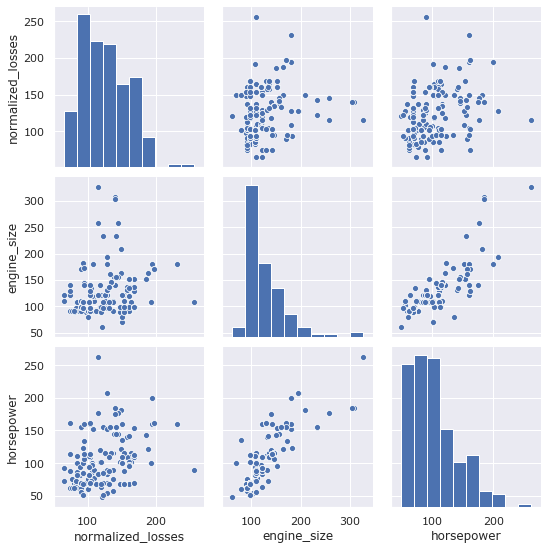

In [191]:
sns.pairplot(auto[['normalized_losses', 'engine_size', 'horsepower']]);

Plotly offer same option with scatter_matrix . Outputs are similar in both plots other than seaborn doesn’t have interactivity.

https://plotly.com/python/splom/

In [192]:
fig = px.scatter_matrix(auto, dimensions=auto[['normalized_losses', 'engine_size', 'horsepower']],width=700, height=700)
fig.show()

On the other hand Plotly Express can extend more drill down using various colors to another variable as below. Seaborn doesn’t support it.

In [193]:
fig = px.scatter_matrix(auto, dimensions=auto[['normalized_losses', 'engine_size', 'horsepower']],color="fuel_type",width=700, height=700)
fig.show()

## Plotting with categorical data

Categorical variables and numerical variables drill down can be done easily with strip plot, box plot ,  violin plot which offered by both libraries. Both of them offers great looking plots, but Plotly will allow you to analyze variability in comprehensive way with interactivity. Below Examples will work you through a great comparison.

https://plotly.com/python/box-plots/

https://plotly.com/python/violin/

https://plotly.com/python/strip-charts/

### strip plot

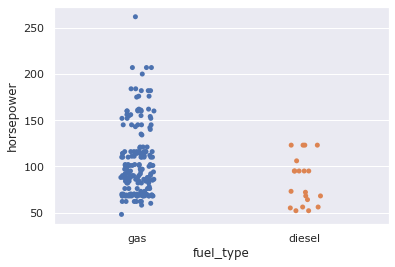

In [194]:
sns.stripplot(auto['fuel_type'], auto['horsepower'], jitter=True);

In [195]:
fig = px.strip(auto, x="fuel_type", y="horsepower",width=600, height=400)
fig.show()

### Box plots

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 

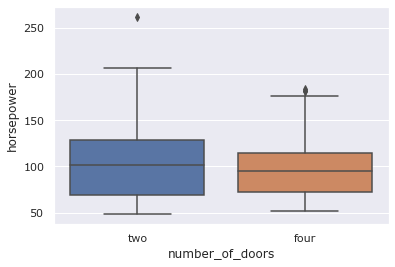

In [196]:
sns.boxplot(auto['number_of_doors'], auto['horsepower']);

In [197]:
fig = px.box(auto, x="number_of_doors", y="horsepower",width=600, height=400)
fig.show()

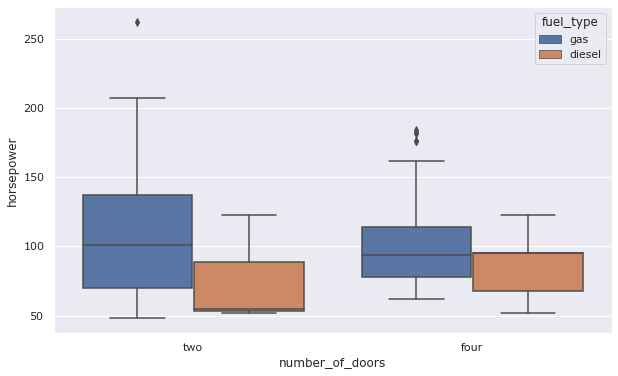

In [198]:
plt.figure(figsize=(10,6))
sns.boxplot(auto['number_of_doors'], auto['horsepower'], hue=auto['fuel_type']);

In [199]:
fig = px.box(auto, x="number_of_doors", y="horsepower", color="fuel_type",width=800, height=500)
fig.show()

### Violin plots

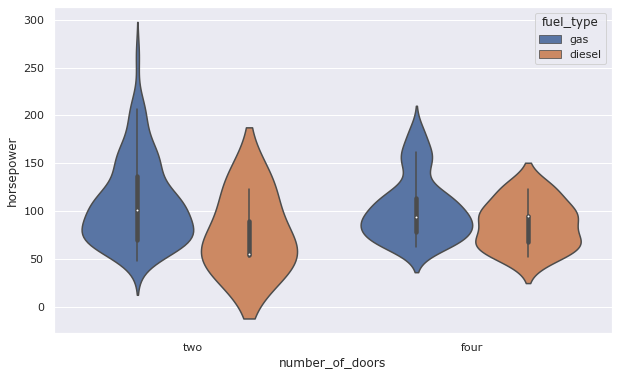

In [200]:
plt.figure(figsize=(10,6))
sns.violinplot(y=auto["horsepower"], x=auto["number_of_doors"], hue=auto["fuel_type"]);

In [201]:
fig = px.violin(auto, y="horsepower", x="number_of_doors", color="fuel_type", box=True, points="all",width=800, height=500)
fig.show()

### Bar plots

We can plot the mean of a a dataset, separated in categories using the barplot() function in Seaborn. When there are multiple observations in each category, it uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

Bar plots start at 0, which can sometimes be practical if zero is a number you want to compare to.

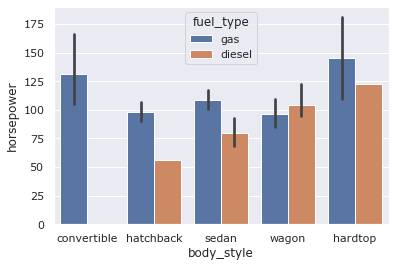

In [202]:
sns.barplot(auto['body_style'], auto['horsepower'], hue=auto['fuel_type']);

in Seaborn , a special case for the bar plot is when you want to show the number of observations in each category rather than computing the mean of a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

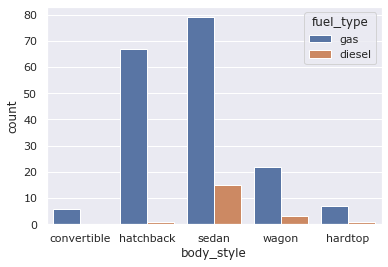

In [203]:
sns.countplot(auto['body_style'],hue=auto['fuel_type']);

Plotly offered barplot option is different than Seaborn notation. There is no countplot option necessary in plotly as it can be realized by pandas dataframe functions and plotting in plotly express bar plot. Please refer to the documentation where you can find lots of sample codes.

https://plotly.com/python/bar-charts/

In [204]:
fig = px.bar(auto, x="body_style", y="horsepower", color='fuel_type',barmode='group',width=600, height=400)
fig.show()

### Heat Map 

Both Libraries are offering heatmap plot which is very useful visualization for many cases. Below are the sample codes from each libraries.

https://plotly.com/python/imshow/

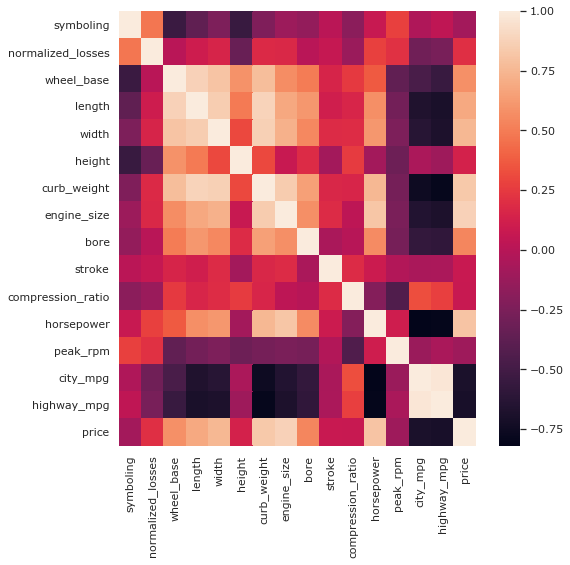

In [205]:
plt.figure(figsize=(8,8))
sns.heatmap(auto.corr())
plt.show()

In [206]:
fig = px.imshow(auto.corr(),x=list(auto.corr().columns),y=list(auto.corr().columns),width=600, height=600)
fig.show()

### What's more in Plotly Express

Bellow visualizations are very powerfull and not offered by seaborn yet. Plotly Express is rich in many other such visalizations and can be easily adopt to your EDA as documetation is very easy to follow. 

https://plotly.com/python/plotly-express/

### 3D Scatter plot

In [207]:
fig = px.scatter_3d(auto, x='normalized_losses', y='engine_size', z='horsepower', color='fuel_type')
fig.show()